notebook generates rebinned spectra and physical quantities, given specified integration time 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from scipy import optimize
from scipy.optimize import curve_fit

import datetime
import matplotlib.dates as date

from create_arraysII import siiv

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# Rebuild the matplotlib font cache
fm._rebuild()

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

clrs = ['#0051a2', '#97964a', '#ffd44f', '#f4777f', '#93003a']

plt.rcParams['text.usetex'] = True

In [3]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/ebtel_l85_h369_5min_gaussian_test_nolimiter.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/ebtel_l85_h369_gaussian_nolimiter_si_iv_nei.sav',verbose=False,python_dict=False)
#tube = readsav('/Users/WilliamHenryAshfieldIV/dat/ebtel_l85_h369_5min_gaussian_test.sav',verbose=False,python_dict=False)
#frac = readsav('/Users/WilliamHenryAshfieldIV/dat/ebtel_l85_h369_gaussian_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [4]:
t_n = tube.tarr.shape[0] - 1 # len of tube in time (in steps of 0.2s)
line = 1402.77

/Users/WilliamHenryAshfieldIV/synth_spec/ebtel/test_arr/create_arraysII.py:84: RuntimeWarning: invalid value encountered in true_divide
  temp_fac = f_nei/f_eqi
/Users/WilliamHenryAshfieldIV/synth_spec/ebtel/test_arr/create_arraysII.py:141: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/synth_spec/ebtel/test_arr/create_arraysII.py:195: RuntimeWarning: invalid value encountered in sqrt
  meas_error = np.sqrt(tot_emissNEI) # error measured


(1402.0, 1404.0)

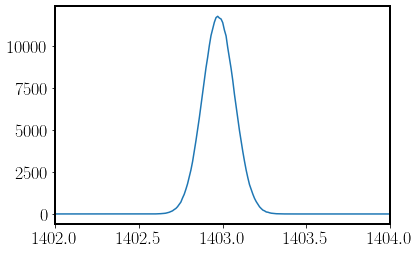

In [5]:
k = 400
arrs = siiv(tube,frac,log10T,log10G,time=k)
plt.plot(arrs.wav,arrs.spec/4.)
plt.xlim(1402,1404)

In [6]:
np.max(arrs.spec/4.)

11802.171624690778

In [7]:
arrs.rebin() # takes a bit.

reshape index =  20


/Users/WilliamHenryAshfieldIV/synth_spec/ebtel/test_arr/create_arraysII.py:84: RuntimeWarning: invalid value encountered in true_divide
  temp_fac = f_nei/f_eqi
/Users/WilliamHenryAshfieldIV/synth_spec/ebtel/test_arr/create_arraysII.py:141: RuntimeWarning: invalid value encountered in true_divide
  factor = nei/eqi
/Users/WilliamHenryAshfieldIV/synth_spec/ebtel/test_arr/create_arraysII.py:195: RuntimeWarning: invalid value encountered in sqrt
  meas_error = np.sqrt(tot_emissNEI) # error measured
/Users/WilliamHenryAshfieldIV/synth_spec/ebtel/test_arr/create_arraysII.py:141: RuntimeWarning: divide by zero encountered in true_divide
  factor = nei/eqi


number of time elements after rebin:  40


In [8]:
arrs.time

array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
        44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
        88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
       132., 136., 140., 144., 148., 152., 156.])

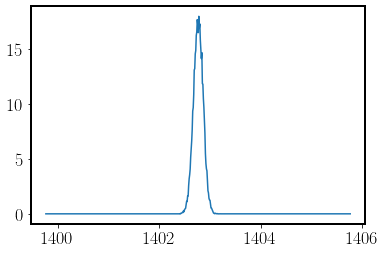

In [62]:
plt.plot(arrs.wav,arrs.respec[7,:]/4.)

Text(0.5, 0, 'wavelength [$\\AA$]')

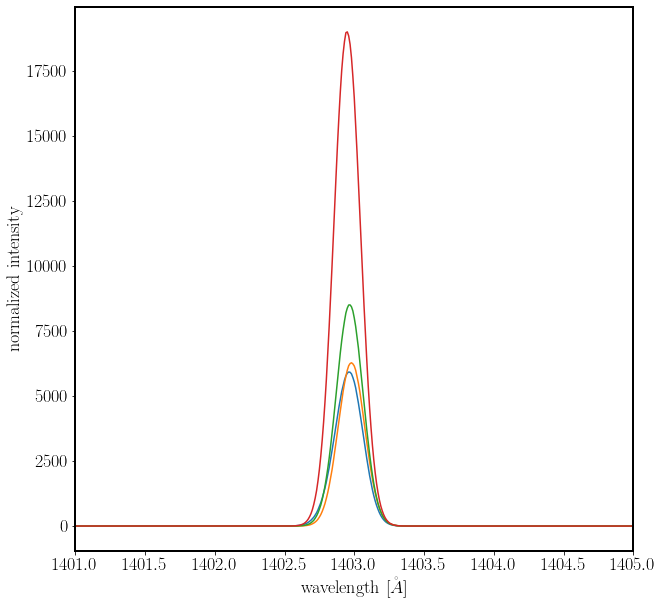

In [9]:
fig, ax = plt.subplots(figsize=[10,10])
plt.plot(arrs.wav,arrs.respec[8,:]/4.)
plt.plot(arrs.wav,arrs.respec[9,:]/4.)
plt.plot(arrs.wav,arrs.respec[10,:]/4.)
plt.plot(arrs.wav,arrs.respec[11,:]/4.)
plt.xlim(1401,1405)
plt.ylabel('normalized intensity')
ax.set_xlabel('wavelength [$\AA$]')

In [10]:
arrs.respec.shape

(40, 600)

# Time series of synthetic spectrum:

In [11]:
arrs.fitspec()

nt =  40
i =  0
a2g1 =  1402.770411774315
a2g4 =  1402.770411774315
i =  1
a2g1 =  1402.7707637742058
a2g4 =  1402.7707637742058
i =  2
a2g1 =  1402.7704167560285
a2g4 =  1402.7704167560285
i =  3
a2g1 =  1402.7697356505935
a2g4 =  1402.7697356505935
i =  4
a2g1 =  1402.7721864098435
a2g4 =  1402.7721864098435
i =  5
a2g1 =  1402.7705412096288
a2g4 =  1402.7705412096288
i =  6
a2g1 =  1402.7694638587861
a2g4 =  1402.7694638587861
i =  7
a2g1 =  1403.07125183914
a2g4 =  1402.7719149496124
i =  8
a2g1 =  1402.960812006808
a2g4 =  1402.960812006808
i =  9
a2g1 =  1402.979713868084
a2g4 =  1402.979713868084
i =  10
a2g1 =  1402.9667408636135
a2g4 =  1402.9667408636135
i =  11
a2g1 =  1402.9486161309203
a2g4 =  1402.9486161309203
i =  12
a2g1 =  1402.9287670887686
a2g4 =  1402.9287670887686
i =  13
a2g1 =  1402.9123768654308
a2g4 =  1402.9123768654308
i =  14
a2g1 =  1402.899035467605
a2g4 =  1402.899035467605
i =  15
a2g1 =  1402.8856860935566
a2g4 =  1402.8856860935566
i =  16
a2g1 =  140

(0.0, 60.0)

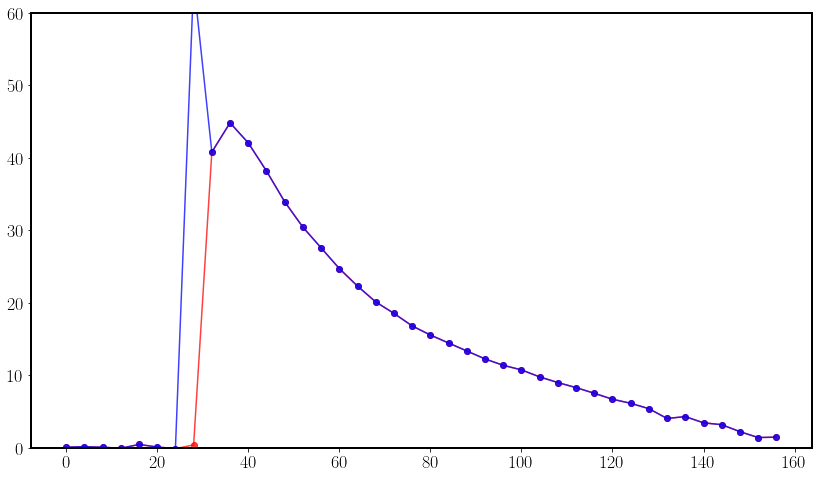

In [12]:
plt.figure(figsize=(14,8))
plt.plot(arrs.time,arrs.vr,'r',alpha=0.75,marker='o')
plt.plot(arrs.time,arrs.vb,'b',alpha=0.75,marker='o')
plt.ylim(0,60)

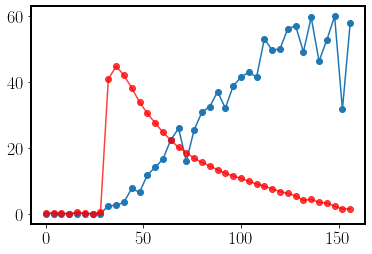

In [13]:
plt.plot(arrs.time,arrs.amp/np.max(arrs.amp)*60,marker='o')
plt.plot(arrs.time,arrs.vr,'r',alpha=0.75,marker='o')
#plt.plot(arrs.time,arrs.amp/4.,marker='o')
#plt.ylim(0,60)

In [14]:
i_max = np.argmax(arrs.vr)
shift_time = arrs.time[i_max+1]#-61454.63

In [15]:
shift_time

40.0

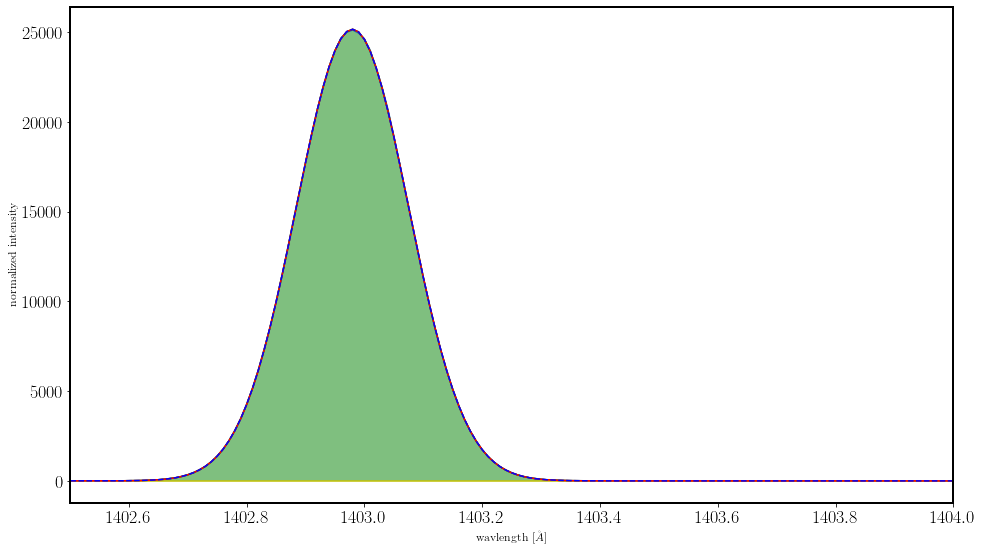

In [16]:
arrs.plotgauss(itime=i_max)

# Fit:

In [17]:
def u0_fit(t, *a):
    return a[0]/(1+t/a[1])

In [18]:
imax = np.argmax(arrs.vr) 

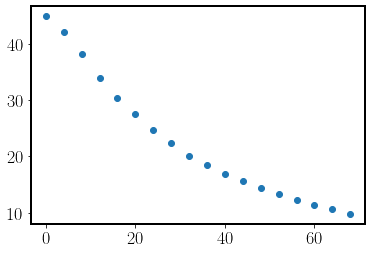

In [19]:
tt = arrs.time[imax:imax+18]
tt = tt-tt[0]
vr = arrs.vr[imax:imax+18]
plt.plot(tt,vr,'o')

In [20]:
a0= [arrs.vr[imax],6]
popt, pcov = curve_fit(u0_fit, tt, vr,p0=a0)

In [21]:
preft_fit = u0_fit(tt,*popt)
f = interp1d(tt,preft_fit,kind='cubic')

In [22]:
tnew = np.linspace(tt[0], tt[-1], num=51, endpoint=True)

In [23]:
tnew = np.linspace(tt[0], tt[-1], num=501, endpoint=True)

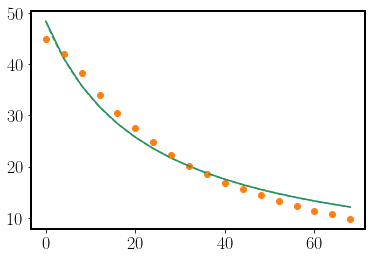

In [24]:
plt.plot(tt,u0_fit(tt,*popt))
plt.plot(tt,vr,'o')
plt.plot(tnew,f(tnew),'--')

In [25]:
H = 0.6*popt[0]*popt[1]
print('H = ', H)
print('tau = ',popt[1])

H =  660.8399630894731
tau =  22.760699442957375


 # Move to CCSDS time

In [26]:
aiatime = readsav('/Users/WilliamHenryAshfieldIV/dat/aia2preft_ccsds.sav',verbose=False,python_dict=False)

In [27]:
aiatm = np.array(aiatime.aiat)
aiatm = aiatm[0:900]

In [28]:
tm = arrs.time
sttime = 61558.47-shift_time # observation start time in sec.
tm += sttime # shifts array such that peaks in IRIS and PREFT align in time.

In [29]:
dts = np.empty(len(tm), dtype = '<U15')
for i in range (0,len(tm)):
    dts[i] = str(datetime.timedelta(seconds=tm[i],milliseconds=3))

In [30]:
dts[0] # should match IRIS peak time.. 

'17:05:18.473000'

In [31]:
tmp = np.array([datetime.datetime for x in range(len(tm))])
for i in range(0,len(tm)):
    tmp[i]=datetime.datetime.strptime(dts[i],'%H:%M:%S.%f')
tm_d = date.date2num(tmp)

In [32]:
stm_d = tm_d[imax:imax+18]

(0.0, 45.0)

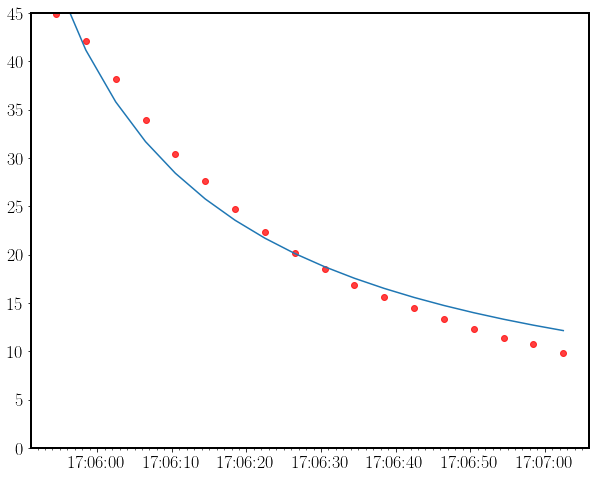

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot_date(stm_d,vr,'r' 'o',alpha=0.75)
ax.plot_date(stm_d,u0_fit(tt,*popt),'-')

ax.xaxis.set_major_formatter(date.DateFormatter('%H:%M:%S'))
ax.xaxis.set_minor_locator(date.SecondLocator())

ax.set_ylim(0,45)

In [34]:
str0 = -25566.287457025464 # from fit_iris

# IRIS fit data
(need to run px69fit.ipynb first!)

In [35]:
%store -r vr_fitII
%store -r vr_iris
%store -r tm_fit
%store -r tm_fitII

In [36]:
firis = interp1d(tm_fitII,vr_fitII,kind='cubic')
tiris = np.linspace(tm_fitII[0], tm_fitII[-1], num=51, endpoint=True)

In [37]:
imax

9

(0.0, 44.0)

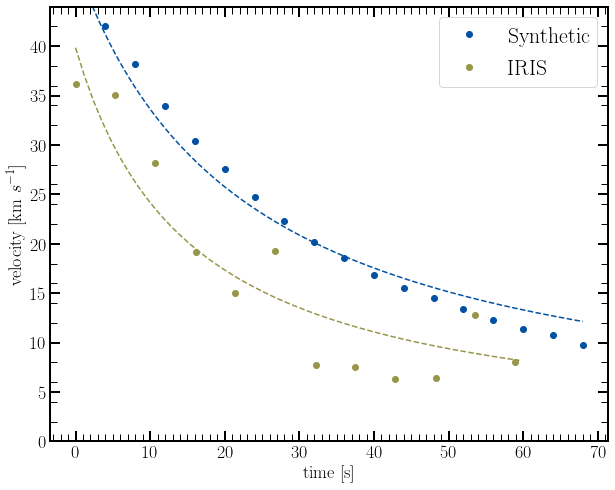

In [38]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(tt,vr,'o',label='Synthetic', color = clrs[0])
ax.plot(tnew,f(tnew), '--', color = clrs[0])
ax.plot(tm_fit,vr_iris,'o',label='IRIS', color = clrs[1])
ax.plot(tiris,firis(tiris), '--', color = clrs[1])

ax.set_xlabel('time [s]')
ax.set_ylabel('velocity [km $s^{-1}$]')
ax.legend(fontsize='large')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#ax.set_xlim(-1.5, 68)
ax.set_ylim(0, 44)

#fig.savefig('IRIS_PREFT_velocities.pdf', format='pdf',facecolor='w', edgecolor='w', dpi = 1000)

## Scaled 'data'
Corresponding to $30^\circ$ deviation from LOS

In [39]:
1/np.sqrt(2)

0.7071067811865475

In [40]:
np.cos(np.pi/5)

0.8090169943749475

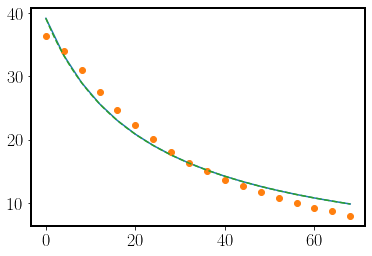

In [41]:
vr2 = vr*np.cos(np.pi/5)

a0= [vr2[0],6]
popt2, pcov2 = curve_fit(u0_fit, tt, vr2,p0=a0)

preft_fit2 = u0_fit(tt,*popt2)
f2 = interp1d(tt,preft_fit2,kind='cubic')

plt.plot(tt,u0_fit(tt,*popt2))
plt.plot(tt,vr2,'o')
plt.plot(tnew,f2(tnew),'--')

In [42]:
H = 0.6*popt2[0]*popt2[1]
print('H = ', H)
print('tau = ',popt2[1])

H =  534.6307606225956
tau =  22.760699437654033


In [43]:
popt2[0]
vr2[0]

36.28436947669307

(0.0, 42.0)

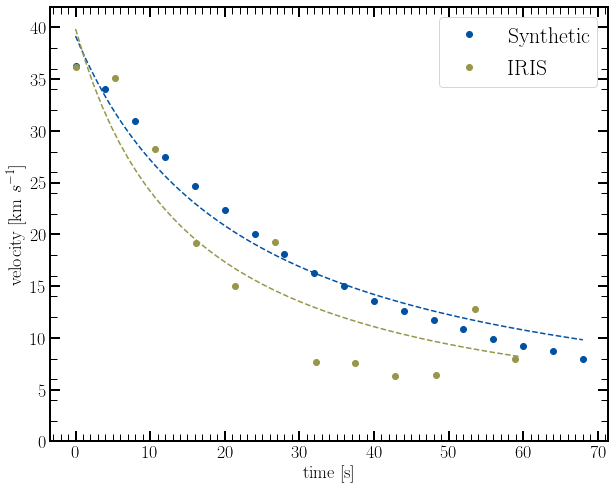

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(tt,vr2,'o',label='Synthetic', color = clrs[0])
ax.plot(tnew,f2(tnew), '--', color = clrs[0])
ax.plot(tm_fit,vr_iris,'o',label='IRIS', color = clrs[1])
ax.plot(tiris,firis(tiris), '--', color = clrs[1])

ax.set_xlabel('time [s]')
ax.set_ylabel('velocity [km $s^{-1}$]')
ax.legend(fontsize='large')

ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')

ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax.set_ylim(0, 42)

#fig.savefig('IRIS_PREFT_velocities_scaled.pdf', format='pdf',facecolor='w', edgecolor='w', dpi = 1000)

In [45]:
tm-=sttime

In [46]:
CBcc = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']


In [47]:
imax

9

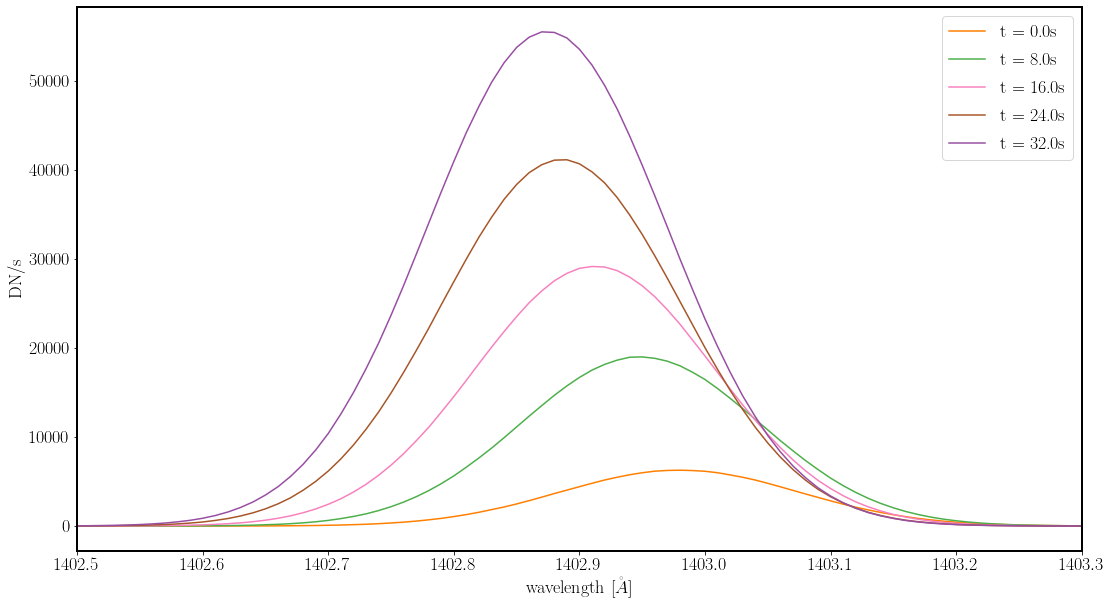

In [48]:
fig, ax = plt.subplots(figsize=[18,10])
#plt.plot(ll,arrs.respec[17,:]/(4.),color = CBcc[0],label='t = '+str(tt[0])+'s')
#plt.plot(arrs.wav,arrs.respec[7,:]/(4.),color = CBcc[1],label='t = '+str(tt[0])+'s')
plt.plot(arrs.wav,arrs.respec[9,:]/(4.),color = CBcc[1],label='t = '+str(tt[0])+'s')
plt.plot(arrs.wav,arrs.respec[11,:]/(4.),color = CBcc[2],label='t = '+str(tt[2])+'s')
plt.plot(arrs.wav,arrs.respec[13,:]/(4.),color = CBcc[3],label='t = '+str(tt[4])+'s')
plt.plot(arrs.wav,arrs.respec[15,:]/(4.),color = CBcc[4],label='t = '+str(tt[6])+'s')
plt.plot(arrs.wav,arrs.respec[16,:]/(4.),color = CBcc[5],label='t = '+str(tt[8])+'s')
#plt.plot(ll,arrs.respec[35,:]/(4.),color = CBcc[7],label='t = '+str(tt[35-19])+'s')
plt.xlim(1402.5,1403.3)
plt.ylabel('DN/s')
ax.set_xlabel('wavelength [$\AA$]')
ax.legend()

In [49]:
#fig.savefig('synth_spectrum.pdf', format='pdf',facecolor='w', edgecolor='w', dpi = 1000)

In [50]:
llv = (arrs.wav-line)/line*3e5

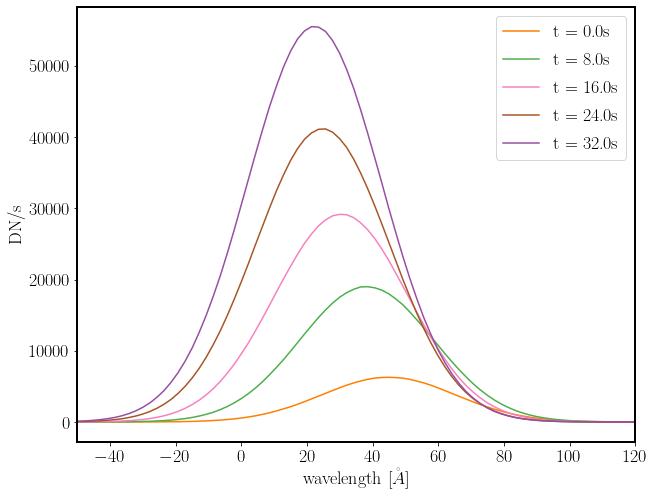

In [51]:
fig, ax = plt.subplots(figsize=[10,8])
#plt.plot(ll,arrs.respec[17,:]/(4.),color = CBcc[0],label='t = '+str(tt[0])+'s')
plt.plot(llv,arrs.respec[9,:]/(4.),color = CBcc[1],label='t = '+str(tt[0])+'s')
plt.plot(llv,arrs.respec[11,:]/(4.),color = CBcc[2],label='t = '+str(tt[2])+'s')
plt.plot(llv,arrs.respec[13,:]/(4.),color = CBcc[3],label='t = '+str(tt[4])+'s')
plt.plot(llv,arrs.respec[15,:]/(4.),color = CBcc[4],label='t = '+str(tt[6])+'s')
plt.plot(llv,arrs.respec[16,:]/(4.),color = CBcc[5],label='t = '+str(tt[8])+'s')
#plt.plot(ll,arrs.respec[35,:]/(4.),color = CBcc[7],label='t = '+str(tt[35-19])+'s')
plt.xlim(35-85,35+85)
plt.ylabel('DN/s')
ax.set_xlabel('wavelength [$\AA$]')
ax.legend()

In [52]:
ll=arrs.wav

(1402.5, 1403.3)

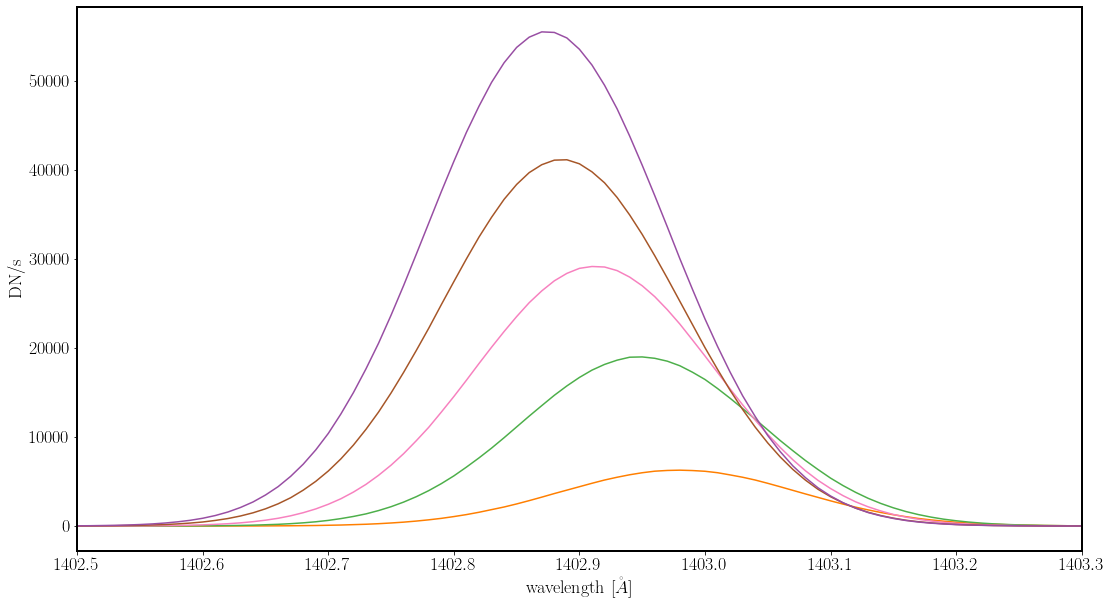

In [53]:
fig, ax = plt.subplots(figsize=[18,10])
plt.plot(arrs.wav,arrs.respec[9,:]/(4.),color = CBcc[1],label='t = '+str(tt[0])+'s')
plt.plot(arrs.wav,arrs.respec[11,:]/(4.),color = CBcc[2],label='t = '+str(tt[2])+'s')
plt.plot(arrs.wav,arrs.respec[13,:]/(4.),color = CBcc[3],label='t = '+str(tt[4])+'s')
plt.plot(arrs.wav,arrs.respec[15,:]/(4.),color = CBcc[4],label='t = '+str(tt[6])+'s')
plt.plot(arrs.wav,arrs.respec[16,:]/(4.),color = CBcc[5],label='t = '+str(tt[8])+'s')
plt.xlim(1401,1405)
plt.ylabel('DN/s')
ax.set_xlabel('wavelength [$\AA$]')
plt.xlim(1402.5,1403.3)

In [54]:
vr[1]

42.07550709243424

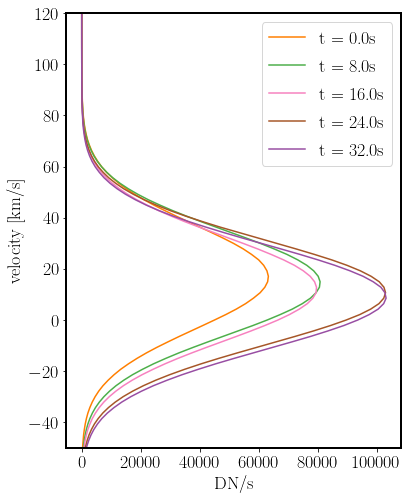

In [55]:
fig, ax = plt.subplots(figsize=[6,8])
#plt.plot(ll,arrs.respec[17,:]/(4.),color = CBcc[0],label='t = '+str(tt[0])+'s')
plt.plot(arrs.respec[19,:]/(4.),llv,color = CBcc[1],label='t = '+str(tt[0])+'s')
plt.plot(arrs.respec[21,:]/(4.),llv,color = CBcc[2],label='t = '+str(tt[2])+'s')
plt.plot(arrs.respec[23,:]/(4.),llv,color = CBcc[3],label='t = '+str(tt[4])+'s')
plt.plot(arrs.respec[25,:]/(4.),llv,color = CBcc[4],label='t = '+str(tt[6])+'s')
plt.plot(arrs.respec[27,:]/(4.),llv,color = CBcc[5],label='t = '+str(tt[8])+'s')
#plt.plot(ll,arrs.respec[35,:]/(4.),color = CBcc[7],label='t = '+str(tt[35-19])+'s')
ax.set_ylim(35-85,35+85)
ax.set_xlabel('DN/s')
ax.set_ylabel('velocity [km/s]')
ax.legend()

In [56]:
vspec = arrs.respec*np.cos(np.pi/5)

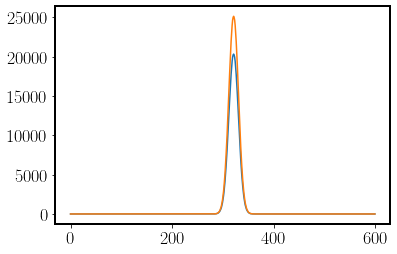

In [57]:
plt.plot(vspec[9])
plt.plot(arrs.respec[9])

In [58]:
vspec.shape

(40, 600)

(0.0, 42.0)

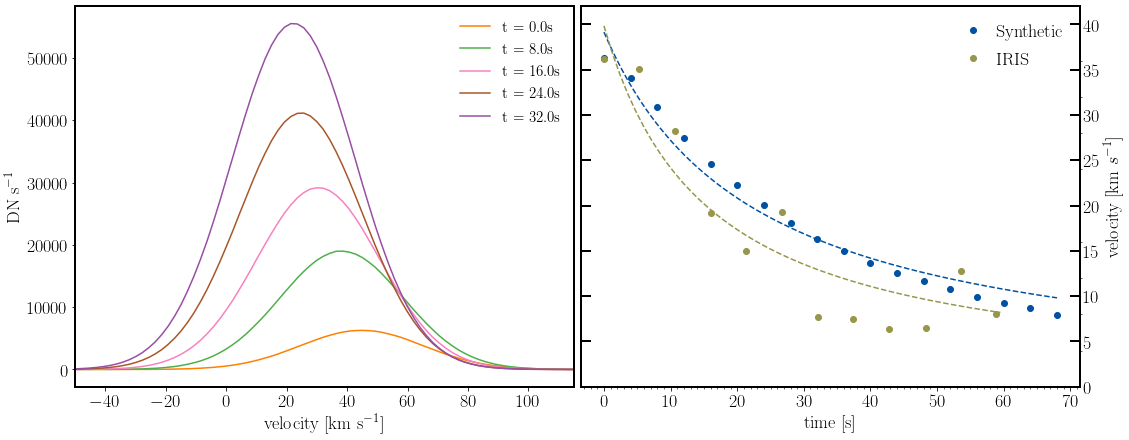

In [79]:
fig2 = plt.figure(figsize=[18,7],constrained_layout=False)
#spec2 = gridspec.GridSpec(ncols=1, nrows=8, figure=fig2,wspace=10.5)
spec2 = fig2.add_gridspec(ncols=12, nrows=1, figure=fig2,wspace=0.1)
ax1 = fig2.add_subplot(spec2[0:6])
ax1.plot(llv,arrs.respec[9,:]/(4.),color = CBcc[1],label='t = '+str(tt[0])+'s')
ax1.plot(llv,arrs.respec[11,:]/(4.),color = CBcc[2],label='t = '+str(tt[2])+'s')
ax1.plot(llv,arrs.respec[13,:]/(4.),color = CBcc[3],label='t = '+str(tt[4])+'s')
ax1.plot(llv,arrs.respec[15,:]/(4.),color = CBcc[4],label='t = '+str(tt[6])+'s')
ax1.plot(llv,arrs.respec[16,:]/(4.),color = CBcc[5],label='t = '+str(tt[8])+'s')

#ax1.xaxis.tick_top() 
ax1.set_xlim(35-85,35+80)
ax1.set_ylabel('DN s$^{-1}$')
ax1.set_xlabel('velocity [km s$^{-1}$]')
#ax1.xaxis.set_label_position('top') 
ax1.legend(fontsize='small',frameon=False)

#ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1)


ax2 = fig2.add_subplot(spec2[6:])
ax2.plot(tt,vr2,'o',label='Synthetic', color = clrs[0])
ax2.plot(tnew,f2(tnew), '--', color = clrs[0])
ax2.plot(tm_fit,vr_iris,'o',label='IRIS', color = clrs[1])
ax2.plot(tiris,firis(tiris), '--', color = clrs[1])

ax2.yaxis.tick_right() 
ax2.set_xlabel('time [s]')
ax2.set_ylabel('velocity [km $s^{-1}$]')
ax2.legend(loc='best',fontsize='medium',handletextpad=0.3,frameon=False)
ax2.yaxis.set_label_position('right') 



#ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
#ax2.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
#ax2.yaxis.set_tick_params(which='minor', size=6, width=1, direction='in', right='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', left='on')
#ax2.yaxis.set_tick_params(which='minor', size=6, width=1, direction='in', left='on')

ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(4))
ax2.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

#ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
#ax1.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

ax2.set_ylim(0, 42)

In [81]:
#fig2.savefig('synth.pdf', format='pdf',facecolor='w', edgecolor='w', dpi = 1000,bbox_inches='tight')